Import libraries and data set

In [3]:
import modin.pandas as pd

In [4]:
dataset=pd.read_csv('milknew.csv')

To remove this warning, run the following python code before doing dataframe operations:

    import ray
    ray.init()



In [5]:
dataset.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [6]:
dataset.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [7]:
dataset.isna().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

Convert string to integer

In [8]:
dataset['Grade'].replace({'high':2,"medium":1,"low":0},inplace=True)

In [9]:
dataset['Grade'].value_counts()

Please refer to https://modin.readthedocs.io/en/stable/supported_apis/defaulting_to_pandas.html for explanation.


0    429
1    374
2    256
Name: Grade, dtype: int64

<AxesSubplot:>

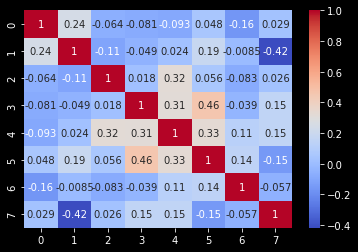

In [10]:
import seaborn as sns

sns.heatmap(dataset.corr(),annot=True, cmap='coolwarm',annot_kws={"size": 10})

In [11]:
X=dataset.drop("Grade",axis=1)

In [12]:
Y=dataset["Grade"]

In [13]:
Y[0:5]

0    2
1    2
2    0
3    0
4    1
Name: Grade, dtype: int64

Split data set into training and test set

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [15]:
print(X.shape, Y.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1059, 7) (1059,) (847, 7) (212, 7) (847,) (212,)


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

Decision Tree

In [17]:
model_decision_tree=DecisionTreeClassifier()
model_decision_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
prediction_decision_tree=model_decision_tree.predict(x_test)
print(prediction_decision_tree)

[1 0 0 1 0 1 2 1 0 2 2 0 2 0 1 1 0 1 2 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 2 1 1
 2 2 0 1 2 1 2 2 0 1 0 0 2 0 2 2 2 2 1 0 0 1 2 2 2 0 2 0 0 0 2 1 1 2 0 2 0
 2 0 1 2 0 0 2 0 2 2 0 1 0 0 0 1 0 1 0 2 1 2 1 2 0 0 2 1 0 2 0 0 1 0 2 1 1
 0 0 1 1 2 0 2 1 0 1 1 1 0 2 1 2 0 2 1 0 0 2 1 0 0 0 1 0 2 0 1 0 1 1 2 1 1
 0 0 0 1 2 1 2 1 2 0 1 0 0 1 1 0 0 1 1 0 2 0 1 1 1 2 1 1 1 2 0 0 0 0 1 0 2
 2 2 0 1 0 0 1 2 0 0 2 2 1 1 2 1 0 0 1 2 1 2 0 1 1 0 0]


In [19]:
y_test[0:10]

501    1
507    0
879    0
415    1
22     0
495    1
109    2
666    1
11     0
931    2
Name: Grade, dtype: int64

In [20]:
from sklearn.metrics import accuracy_score, homogeneity_score, rand_score,completeness_score
print("Accuracy:",accuracy_score(y_test,prediction_decision_tree))
print("Precision:",metrics.precision_score(y_test,prediction_decision_tree,average='weighted'))
print("Homogeneity:",homogeneity_score(y_test,prediction_decision_tree))
print("Rand Score:",rand_score(y_test,prediction_decision_tree))

Accuracy: 0.9858490566037735
Precision: 0.9864150943396227
Homogeneity: 0.9372473465800384
Rand Score: 0.9815791826880086


<AxesSubplot:>

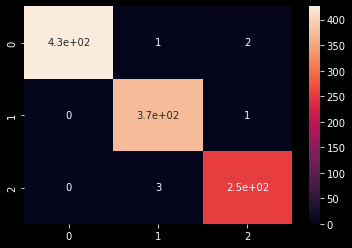

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
cross_val=cross_val_predict(model_decision_tree,X,Y,cv=3)
sns.heatmap(confusion_matrix(Y,cross_val),annot=True)

In [22]:
metrics.accuracy_score(prediction_decision_tree,y_test)

0.9858490566037735

In [23]:
model_random_forest=RandomForestClassifier(n_estimators=100)
model_random_forest.fit(x_train,y_train)

RandomForestClassifier()

In [24]:
prediction_random_forest=model_random_forest.predict(x_test)

In [25]:
print("Accuracy:",accuracy_score(y_test,prediction_random_forest))
print("Precision:",metrics.precision_score(y_test,prediction_random_forest,average='weighted'))
print("Homogeneity:",homogeneity_score(y_test,prediction_random_forest))
print("Rand Score:",rand_score(y_test,prediction_random_forest))

Accuracy: 0.9905660377358491
Precision: 0.9908210096889343
Homogeneity: 0.9542253964271892
Rand Score: 0.9873468657784137
